# Artifical Neural Networks (Regression)

In [6]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

from warnings import filterwarnings
filterwarnings('ignore')

In [7]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [54]:
hit.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [64]:
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64

In [50]:
X_

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497.0,127.0,7.0,65.0,48.0,37.0,5.0,2703.0,806.0,32.0,379.0,311.0,138.0,325.0,9.0,3.0
318,492.0,136.0,5.0,76.0,50.0,94.0,12.0,5511.0,1511.0,39.0,897.0,451.0,875.0,313.0,381.0,20.0
319,475.0,126.0,3.0,61.0,43.0,52.0,6.0,1700.0,433.0,7.0,217.0,93.0,146.0,37.0,113.0,7.0
320,573.0,144.0,9.0,85.0,60.0,78.0,8.0,3198.0,857.0,97.0,470.0,420.0,332.0,1314.0,131.0,12.0


In [51]:
dms

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0
...,...,...,...,...,...,...
317,0,1,1,0,0,1
318,1,0,1,0,1,0
319,1,0,0,1,1,0
320,1,0,1,0,1,0


In [48]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [10]:
from sklearn.preprocessing import StandardScaler

In [62]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [61]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
from sklearn.neural_network import MLPRegressor

In [36]:
mlp_model = MLPRegressor(hidden_layer_sizes = (100,20)).fit(X_train_scaled,y_train)

In [37]:
mlp_model

MLPRegressor(hidden_layer_sizes=(100, 20))

In [21]:
mlp_model.n_layers_

3

In [65]:
mlp_model.hidden_layer_sizes

(100, 20)

## Tahmin

In [24]:
mlp_model.predict(X_train_scaled)[:5]

array([ 5.46665698, 54.84312544, 36.7078339 ,  4.84683251,  4.19199056])

In [25]:
y_pred = mlp_model.predict(X_test_scaled)[:5]

In [26]:
y_pred

array([27.28053777, 46.32336483, 84.15752769, 12.02290157, 24.62074854])

In [30]:
np.sqrt(mean_squared_error(y_test, y_pred))

ValueError: Found input variables with inconsistent numbers of samples: [66, 5]

## Model Tuning

In [38]:
?mlp_model

Type:        MLPRegressor
String form: MLPRegressor(hidden_layer_sizes=(100, 20))
File:        c:\users\mustafa\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py
Docstring:  
Multi-layer Perceptron regressor.

This model optimizes the squared error using LBFGS or stochastic gradient
descent.

.. versionadded:: 0.18

Parameters
----------
hidden_layer_sizes : tuple, length = n_layers - 2, default=(100,)
    The ith element represents the number of neurons in the ith
    hidden layer.

activation : {'identity', 'logistic', 'tanh', 'relu'}, default='relu'
    Activation function for the hidden layer.

    - 'identity', no-op activation, useful to implement linear bottleneck,
      returns f(x) = x

    - 'logistic', the logistic sigmoid function,
      returns f(x) = 1 / (1 + exp(-x)).

    - 'tanh', the hyperbolic tan function,
      returns f(x) = tanh(x).

    - 'relu', the rectified linear unit function,
      returns f(x) = max(0, x)

solver : {'lbfgs', 'sg

In [39]:
mlp_params = {"alpha" : [0.1,0.01,0.02,0.005],
              "hidden_layer_sizes" : [(20,20),(100,50,150),(300,200,150)],
              "activation" : ["relu","logistic"]}

In [40]:
mlp_cv_model = GridSearchCV(mlp_model , mlp_params , cv = 10)

In [41]:
mlp_cv_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=MLPRegressor(hidden_layer_sizes=(100, 20)),
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 0.02, 0.005],
                         'hidden_layer_sizes': [(20, 20), (100, 50, 150),
                                                (300, 200, 150)]})

In [42]:
mlp_cv_model.best_params_

{'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (100, 50, 150)}

In [43]:
mlp_tuned = MLPRegressor(activation = 'relu', alpha = 0.1, hidden_layer_sizes = (100, 50, 150))

In [44]:
mlp_tuned.fit(X_train_scaled,y_train)

MLPRegressor(alpha=0.1, hidden_layer_sizes=(100, 50, 150))

In [45]:
y_pred = mlp_tuned.predict(X_test_scaled)

In [46]:
np.sqrt(mean_squared_error(y_test, y_pred))

363.63002554357246

## CART

In [118]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [67]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [119]:
cart_model = DecisionTreeRegressor(max_leaf_nodes = 10)

In [70]:
?cart_model

Type:        DecisionTreeRegressor
String form: DecisionTreeRegressor()
File:        c:\users\mustafa\anaconda3\lib\site-packages\sklearn\tree\_classes.py
Docstring:  
A decision tree regressor.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"squared_error", "friedman_mse", "absolute_error",             "poisson"}, default="squared_error"
    The function to measure the quality of a split. Supported criteria
    are "squared_error" for the mean squared error, which is equal to
    variance reduction as feature selection criterion and minimizes the L2
    loss using the mean of each terminal node, "friedman_mse", which uses
    mean squared error with Friedman's improvement score for potential
    splits, "absolute_error" for the mean absolute error, which minimizes
    the L1 loss using the median of each terminal node, and "poisson" which
    uses reduction in Poisson deviance to find splits.

    .. versionadded:: 0.18
       Mean Absolute Error (MAE)

In [120]:
cart_model.fit(X_train,y_train)

DecisionTreeRegressor(max_leaf_nodes=10)

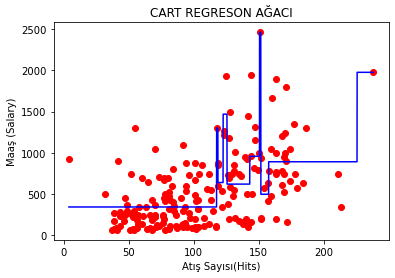

In [78]:
X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)), 0.01) 
X_grid = X_grid.reshape((len(X_grid), 1))  
plt.scatter(X_train, y_train, color = 'red') 
plt.plot(X_grid, cart_model.predict(X_grid), color = 'blue')  
plt.title('CART REGRESON AĞACI')  
plt.xlabel('Atış Sayısı(Hits)') 
plt.ylabel('Maaş (Salary)') ;

In [79]:
pip install skompiler

  Created wheel for skompiler: filename=SKompiler-0.6-py3-none-any.whl size=54286 sha256=f6c7a49460dcd940ba362b56bde96747d7e9fc5c03172a6a561cd0f41c4f0c7f
  Stored in directory: c:\users\mustafa\appdata\local\pip\cache\wheels\fd\94\33\2a75ac13109534426a0ace0cde02f41aef30a846f1facd4110
Successfully built skompiler
Note: you may need to restart the kernel to use updated packages.


In [87]:
pip install astor

Note: you may need to restart the kernel to use updated packages.


In [88]:
from skompiler import skompile
import astor

In [89]:
print(skompile(cart_model.predict).to('python/code'))

(345.2011551724138 if x[0] <= 117.5 else ((((1300.0 if x[0] <= 118.5 else 
    641.0) if x[0] <= 122.5 else 1468.5236666666667) if x[0] <= 125.5 else 
    621.9679230769232) if x[0] <= 143.0 else (958.6111111111111 if x[0] <= 
    150.5 else 2460.0) if x[0] <= 151.5 else 499.1666666666667 if x[0] <= 
    157.5 else 892.5402413793104) if x[0] <= 225.5 else 1975.0)



## Tahmin

In [90]:
x = [91]

In [91]:
(345.2011551724138 if x[0] <= 117.5 else ((((1300.0 if x[0] <= 118.5 else 
    641.0) if x[0] <= 122.5 else 1468.5236666666667) if x[0] <= 125.5 else 
    621.9679230769232) if x[0] <= 143.0 else (958.6111111111111 if x[0] <= 
    150.5 else 2460.0) if x[0] <= 151.5 else 499.1666666666667 if x[0] <= 
    157.5 else 892.5402413793104) if x[0] <= 225.5 else 1975.0)

345.2011551724138

In [92]:
cart_model.predict(X_test)[:5]

array([621.96792308, 958.61111111, 621.96792308, 345.20115517,
       345.20115517])

In [93]:
cart_model.predict([[91]])

array([345.20115517])

In [94]:
y_pred = cart_model.predict(X_test)

In [95]:
np.sqrt(mean_squared_error(y_test, y_pred))

486.34593105235456

## Model Tuning

In [121]:
cart_model = DecisionTreeRegressor()
cart_model.fit(X_train, y_train)
y_pred = cart_model.predict(X_test)

In [122]:
np.sqrt(mean_squared_error(y_test, y_pred))

533.8584253721376

In [123]:
params = {"min_samples_split" : range(2,100),
          "max_leaf_nodes" : range(2,10)}

In [124]:
cart_cv_model = GridSearchCV(cart_model , params , cv = 10)

In [125]:
cart_cv_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_leaf_nodes': range(2, 10),
                         'min_samples_split': range(2, 100)})

In [126]:
cart_cv_model.best_params_

{'max_leaf_nodes': 9, 'min_samples_split': 37}

In [127]:
cart_tuned = cart_model = DecisionTreeRegressor(max_leaf_nodes = 9,min_samples_split = 37)
cart_tuned.fit(X_train, y_train)
y_pred = cart_tuned.predict(X_test)

In [128]:
np.sqrt(mean_squared_error(y_test, y_pred))

376.39788207109865

## Bagging Regressin Model

In [129]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [131]:
bag_model = BaggingRegressor(bootstrap_features = True)

In [132]:
bag_model.fit(X_train, y_train)

BaggingRegressor(bootstrap_features=True)

In [133]:
bag_model.n_estimators

10

In [134]:
bag_model.estimators_

[DecisionTreeRegressor(random_state=2075083204),
 DecisionTreeRegressor(random_state=1561242840),
 DecisionTreeRegressor(random_state=1258324822),
 DecisionTreeRegressor(random_state=1163943424),
 DecisionTreeRegressor(random_state=481129458),
 DecisionTreeRegressor(random_state=482880026),
 DecisionTreeRegressor(random_state=933895979),
 DecisionTreeRegressor(random_state=933328883),
 DecisionTreeRegressor(random_state=252105311),
 DecisionTreeRegressor(random_state=15952856)]

In [136]:
bag_model.estimators_samples_

[array([157,  54, 156, 125,  49, 175,   4,  20,  61,  55,  94,  44,   5,
         56,   8,  88, 152,  48,   4,  32, 170, 155,   1, 120, 120,  51,
         78,   7, 103, 147, 194,  32,  79,  24,   7, 152, 121,  99, 125,
         36,  12, 148, 116, 111, 195, 135, 180, 108,  28,  95, 150, 179,
        101, 196,  75,  36,  16,  81,  97, 134,  95,  90, 128,  93, 191,
         46, 152,  94, 163, 120, 189,  46, 155, 171, 138, 142, 137, 152,
         35, 140, 126, 163,  24, 163,   7, 162,  99,  42,  92, 106,  16,
        132, 170, 126, 132, 186, 113,  82, 107,  23, 144,  13, 181,   4,
         29, 159, 158,  55, 135, 178,  75,  24, 122,  24, 139,  38,   4,
        190, 156,  32,  10, 180, 142, 105, 192, 117, 137,  39,  22, 164,
        174,  29,  61, 163,  19, 142,  48, 174,  57,   5,  69, 178, 167,
         76, 196,  50,  79, 185,  31,   4,  11, 119,  65, 133, 186, 195,
        141,  12,   8,  90,  70, 148, 125,  37,  82, 187,  91,  90,  77,
         82, 154,   2,  89,   3,  81, 150, 183,  48

In [137]:
bag_model.estimators_features_

[array([ 4, 13, 15,  0, 16,  9, 14,  4, 10,  0, 16, 17,  9,  5, 10,  3, 18,
         8, 16]),
 array([ 2,  5,  4,  1,  1, 18, 13, 11, 17,  8,  3, 14,  7,  9, 10, 12,  8,
        14,  1]),
 array([ 6, 11,  2, 11, 18,  1, 18,  6, 15, 16, 13,  8, 17, 12,  0, 13,  8,
        10, 17]),
 array([ 0, 18,  3, 13, 15, 12, 16, 14, 11,  4, 15,  0, 16, 18, 12,  7,  7,
         9, 14]),
 array([18,  9, 18, 10, 11,  9, 18, 14,  5, 12, 13, 14,  3, 15, 18,  0, 18,
         9, 10]),
 array([ 4,  4,  5, 17,  5, 18,  0, 16, 12, 11,  8, 13,  1,  0,  3,  6, 17,
         7,  0]),
 array([11, 14,  3,  7,  4, 17,  5,  4, 16, 15, 18, 18, 15,  2, 10,  4,  5,
         9,  0]),
 array([ 3,  0,  0, 13,  8,  8,  0, 18, 13,  9, 10,  1, 11, 10, 17,  2, 13,
        10, 13]),
 array([ 6,  8, 11,  7,  5, 12, 18,  2, 15, 11,  0, 17,  2,  1,  8,  4, 11,
         6,  8]),
 array([15,  5, 12,  7,  0,  0,  0,  1, 10, 15, 18,  0,  2, 11,  0,  8,  0,
        15, 15])]

In [138]:
bag_model.estimators_[0]

DecisionTreeRegressor(random_state=2075083204)

## Tahmin

In [139]:
y_pred = bag_model.predict(X_test)

In [140]:
np.sqrt(mean_squared_error(y_test, y_pred))

369.07595755553064

In [150]:
iki_y_pred = bag_model.estimators_[1].fit(X_train,y_train).predict(X_test)

In [151]:
np.sqrt(mean_squared_error(y_test, iki_y_pred))

466.09152012503904

In [157]:
yedi_y_pred = bag_model.estimators_[6].fit(X_train,y_train).predict(X_test)

In [158]:
np.sqrt(mean_squared_error(y_test, yedi_y_pred))

521.8948157449928

## Model Tuning

In [159]:
bag_model = BaggingRegressor(bootstrap_features = True)
bag_model.fit(X_train, y_train)

BaggingRegressor(bootstrap_features=True)

In [160]:
bag_params = {"n_estimators" : range(2,20)}

In [161]:
bag_cv_model = GridSearchCV(bag_model,bag_params,cv = 10)

In [162]:
bag_cv_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=BaggingRegressor(bootstrap_features=True),
             param_grid={'n_estimators': range(2, 20)})

In [163]:
bag_cv_model.best_params_

{'n_estimators': 18}

In [167]:
bag_tuned = BaggingRegressor(n_estimators = 18)

In [168]:
bag_tuned.fit(X_train, y_train)

BaggingRegressor(n_estimators=18)

In [169]:
y_pred = bag_tuned.predict(X_test)

In [170]:
np.sqrt(mean_squared_error(y_test, y_pred))

335.9279615721703

## RANDOM FORESTS MODEL

In [171]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [172]:
from sklearn.ensemble import RandomForestRegressor

In [173]:
rf_model = RandomForestRegressor(random_state = 42)

In [174]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Tahmin

In [175]:
rf_model.predict(X_test)

array([ 738.69167,  913.51164, 1181.145  ,  139.65167,  634.60833,
        357.71167,  196.535  ,  115.295  ,  730.72833,  474.68333,
        813.58167,  828.114  ,  510.1    ,  187.07   ,  354.625  ,
        998.59165,  880.67237,  102.845  ,  811.195  ,  270.9    ,
        379.16667,  882.34834,  703.28332,  689.4867 ,  381.375  ,
         80.245  ,  885.19739,  354.075  ,  750.51666,   96.48167,
         89.32   ,  573.115  ,  493.50006,  224.925  ,  256.63168,
        884.08665, 1365.18689,  214.265  ,  118.87   ,  505.91668,
         85.36   ,  128.15   ,  640.29833,  699.525  , 1370.59475,
        855.49995,  491.26667,  103.06   ,  179.25   ,  761.35333,
        836.40069,  576.96667,  735.95833,  188.545  ,  102.07   ,
        820.28497,  648.16667,  708.12498,  212.02003, 1384.87022,
       1151.56766,  551.675  ,  736.58333,  465.9    ,  593.03333,
         78.565  ])

In [176]:
y_pred = rf_model.predict(X_test)

In [177]:
np.sqrt(mean_squared_error(y_test, y_pred))

344.8191624908484

## Model Tuning

In [179]:
rf_params = {'max_depth': list(range(1,10)),
            'max_features': [3,5,10,15],
            'n_estimators' : [100, 200, 500, 1000, 2000]}

In [187]:
rf_model = RandomForestRegressor(random_state = 42)

In [182]:
rf_cv_model = GridSearchCV(rf_model,rf_params,cv = 10,n_jobs = -1)

In [183]:
rf_cv_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': [3, 5, 10, 15],
                         'n_estimators': [100, 200, 500, 1000, 2000]})

In [184]:
rf_cv_model.best_params_

{'max_depth': 8, 'max_features': 3, 'n_estimators': 200}

In [186]:
rf_tuned = RandomForestRegressor(max_depth = 8, max_features = 3 , n_estimators = 200)

In [191]:
rf_tuned.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, max_features=3, n_estimators=200)

In [189]:
y_pred = rf_tuned.predict(X_test)

In [190]:
np.sqrt(mean_squared_error(y_test, y_pred))

345.03863344376566

In [192]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

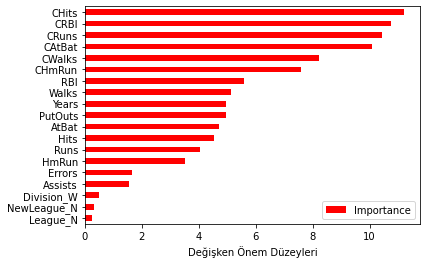

In [193]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

# Gradient Boosting Machines

In [194]:
from sklearn.ensemble import GradientBoostingRegressor

In [195]:
gbm_model = GradientBoostingRegressor()
gbm_model.fit(X_train, y_train)

GradientBoostingRegressor()

## Tahmin

In [196]:
y_pred = gbm_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

352.0410386905747

## Model Tuning

In [197]:
gbm_params = {
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'max_depth': [3, 5, 8,50,100],
    'n_estimators': [200, 500, 1000, 2000],
    'subsample': [1,0.5,0.75],
}

In [198]:
gbm = GradientBoostingRegressor()
gbm_cv_model = GridSearchCV(gbm,gbm_params,cv = 10,n_jobs = -1,verbose = 2)
gbm_cv_model.fit(X_train,y_train)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


GridSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 8, 50, 100],
                         'n_estimators': [200, 500, 1000, 2000],
                         'subsample': [1, 0.5, 0.75]},
             verbose=2)

In [199]:
gbm_cv_model.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.5}

In [200]:
gbm_tuned = GradientBoostingRegressor(learning_rate = 0.1,max_depth = 5,n_estimators = 200,subsample = 0.5)

In [201]:
gbm_tuned = gbm_tuned.fit(X_train,y_train)

In [202]:
y_pred = gbm_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

338.7239577114565

In [203]:
Importance = pd.DataFrame({"Importance": gbm_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

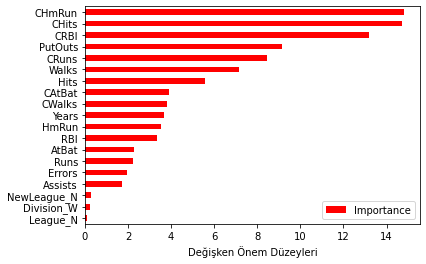

In [204]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

## XGBOOST

In [205]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [207]:
!pip install xgboost

In [208]:
import xgboost as xgb

In [209]:
DM_train = xgb.DMatrix(data = X_train, label = y_train)
DM_test = xgb.DMatrix(data = X_test, label = y_test)

In [210]:
from xgboost import XGBRegressor

In [214]:
xgb_model = XGBRegressor().fit(X_train, y_train)

## Tahmin

In [215]:
y_pred = xgb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

355.46515176059927

In [216]:
xgb_model

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [217]:
xgb_grid = {
     'colsample_bytree': [0.4, 0.5,0.6,0.9,1], 
     'n_estimators':[100, 200, 500, 1000],
     'max_depth': [2,3,4,5,6],
     'learning_rate': [0.1, 0.01, 0.5]
}


In [218]:
xgb = XGBRegressor()

xgb_cv_model = GridSearchCV(xgb,xgb_grid,
                            cv = 10,
                            n_jobs = -1
                            ,verbose = 2)

xgb_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 300 candidates, totalling 3000 fits


GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_ca...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                  

In [219]:
xgb_cv_model.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 2,
 'n_estimators': 500}

In [224]:
xgb_tuned = XGBRegressor(colsample_bytree = 0.5,learning_rate = 0.1,max_depth = 2,n_estimators = 500)
xgb_tuned.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=500, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [225]:
y_pred = xgb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

346.0275204366939

In [226]:
Importance = pd.DataFrame({"Importance": xgb_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

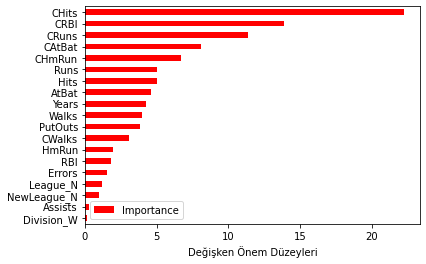

In [227]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

# LightGBM

In [228]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [229]:
!pip install lightgbm

In [230]:
from lightgbm import LGBMRegressor

In [231]:
lgbm = LGBMRegressor()
lgbm_model = lgbm.fit(X_train, y_train)

# Tahmin

In [232]:
y_pred = lgbm_model.predict(X_test, 
                            num_iteration = lgbm_model.best_iteration_)

In [233]:
np.sqrt(mean_squared_error(y_test, y_pred))

363.8712087611089

## Model Tuning

In [234]:
lgbm_model

LGBMRegressor()

In [235]:
lgbm_grid = {
    'colsample_bytree': [0.4, 0.5,0.6,0.9,1],
    'learning_rate': [0.01, 0.1, 0.5,1],
    'n_estimators': [20, 40, 100, 200, 500,1000],
    'max_depth': [1,2,3,4,5,6,7,8] }

lgbm = LGBMRegressor()
lgbm_cv_model = GridSearchCV(lgbm, lgbm_grid, cv=10, n_jobs = -1, verbose = 2)

In [236]:
lgbm_cv_model.fit(X_train,y_train)

Fitting 10 folds for each of 960 candidates, totalling 9600 fits


GridSearchCV(cv=10, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.4, 0.5, 0.6, 0.9, 1],
                         'learning_rate': [0.01, 0.1, 0.5, 1],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'n_estimators': [20, 40, 100, 200, 500, 1000]},
             verbose=2)

In [237]:
lgbm_cv_model.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 6,
 'n_estimators': 20}

In [238]:
lgbm_tuned = LGBMRegressor(colsample_bytree = 0.5,learning_rate = 0.1,max_depth = 6,n_estimators = 20)
lgbm_tuned.fit(X_train, y_train)

LGBMRegressor(colsample_bytree=0.5, max_depth=6, n_estimators=20)

In [241]:
y_pred = lgbm_tuned.predict(X_test)

In [242]:
np.sqrt(mean_squared_error(y_test, y_pred))

375.6085209015434

# CATBOOST

In [243]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [244]:
!pip install catboost

In [245]:
from catboost import CatBoostRegressor

In [246]:
catb = CatBoostRegressor()
catb_model = catb.fit(X_train, y_train)

Learning rate set to 0.031674
0:	learn: 437.6430699	total: 195ms	remaining: 3m 14s
1:	learn: 431.3923642	total: 200ms	remaining: 1m 40s
2:	learn: 424.8820360	total: 206ms	remaining: 1m 8s
3:	learn: 418.2514904	total: 211ms	remaining: 52.5s
4:	learn: 412.6394021	total: 214ms	remaining: 42.5s
5:	learn: 406.6247020	total: 216ms	remaining: 35.7s
6:	learn: 400.5321206	total: 218ms	remaining: 30.9s
7:	learn: 394.6683437	total: 220ms	remaining: 27.3s
8:	learn: 388.2496484	total: 223ms	remaining: 24.5s
9:	learn: 382.9448842	total: 225ms	remaining: 22.3s
10:	learn: 377.2600080	total: 228ms	remaining: 20.5s
11:	learn: 372.4829606	total: 230ms	remaining: 19s
12:	learn: 366.6823437	total: 232ms	remaining: 17.6s
13:	learn: 362.6076230	total: 234ms	remaining: 16.5s
14:	learn: 358.0107745	total: 236ms	remaining: 15.5s
15:	learn: 353.2802665	total: 237ms	remaining: 14.6s
16:	learn: 348.5646265	total: 238ms	remaining: 13.8s
17:	learn: 343.6407912	total: 239ms	remaining: 13.1s
18:	learn: 339.2363847	tot

## Tahmin

In [249]:
y_pred = catb_model.predict(X_test)

In [250]:
np.sqrt(mean_squared_error(y_test, y_pred))

351.194631344607

## Model Tuning

In [251]:
catb_grid = {
    'iterations': [200,500,1000,2000],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'depth': [3,4,5,6,7,8] }

In [252]:
catb = CatBoostRegressor()
catb_cv_model = GridSearchCV(catb, catb_grid, cv=5, n_jobs = -1, verbose = 2)

In [253]:
catb_cv_model.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
0:	learn: 422.4143448	total: 11.6ms	remaining: 11.6s
1:	learn: 404.1864276	total: 13ms	remaining: 6.51s
2:	learn: 386.3231718	total: 14.2ms	remaining: 4.73s
3:	learn: 370.5548032	total: 15.3ms	remaining: 3.82s
4:	learn: 354.9242038	total: 16.6ms	remaining: 3.29s
5:	learn: 342.3403984	total: 17.7ms	remaining: 2.94s
6:	learn: 328.2370070	total: 18.7ms	remaining: 2.65s
7:	learn: 317.5056526	total: 19.8ms	remaining: 2.45s
8:	learn: 306.6243511	total: 20.8ms	remaining: 2.29s
9:	learn: 297.3147023	total: 21.9ms	remaining: 2.16s
10:	learn: 288.3685892	total: 22.9ms	remaining: 2.06s
11:	learn: 281.0996220	total: 23.9ms	remaining: 1.97s
12:	learn: 273.2254898	total: 24.8ms	remaining: 1.89s
13:	learn: 266.9003385	total: 25.8ms	remaining: 1.82s
14:	learn: 261.9092500	total: 26.7ms	remaining: 1.75s
15:	learn: 256.2637350	total: 27.6ms	remaining: 1.7s
16:	learn: 250.3667935	total: 28.5ms	remaining: 1.65s
17:	learn: 244.8631098	total: 29.

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x0000025B4EB51A30>,
             n_jobs=-1,
             param_grid={'depth': [3, 4, 5, 6, 7, 8],
                         'iterations': [200, 500, 1000, 2000],
                         'learning_rate': [0.01, 0.03, 0.05, 0.1]},
             verbose=2)

In [254]:
catb_cv_model.best_params_

{'depth': 5, 'iterations': 1000, 'learning_rate': 0.1}

In [261]:
catb_tuned = CatBoostRegressor(depth = 5,learning_rate = 0.1,iterations = 1000)
catb_tuned.fit(X_train, y_train)

0:	learn: 422.4143448	total: 3.54ms	remaining: 3.54s
1:	learn: 404.1864276	total: 4.67ms	remaining: 2.33s
2:	learn: 386.3231718	total: 5.58ms	remaining: 1.85s
3:	learn: 370.5548032	total: 6.61ms	remaining: 1.65s
4:	learn: 354.9242038	total: 7.4ms	remaining: 1.47s
5:	learn: 342.3403984	total: 8.29ms	remaining: 1.37s
6:	learn: 328.2370070	total: 9.23ms	remaining: 1.31s
7:	learn: 317.5056526	total: 10.3ms	remaining: 1.27s
8:	learn: 306.6243511	total: 11.3ms	remaining: 1.25s
9:	learn: 297.3147023	total: 12.3ms	remaining: 1.22s
10:	learn: 288.3685892	total: 13.1ms	remaining: 1.18s
11:	learn: 281.0996220	total: 14.1ms	remaining: 1.16s
12:	learn: 273.2254898	total: 14.9ms	remaining: 1.13s
13:	learn: 266.9003385	total: 15.9ms	remaining: 1.12s
14:	learn: 261.9092500	total: 16.7ms	remaining: 1.09s
15:	learn: 256.2637350	total: 17.4ms	remaining: 1.07s
16:	learn: 250.3667935	total: 18.3ms	remaining: 1.06s
17:	learn: 244.8631098	total: 19.2ms	remaining: 1.05s
18:	learn: 240.1540669	total: 20ms	rema

In [264]:
y_pred = catb_tuned.predict(X_test)

In [265]:
np.sqrt(mean_squared_error(y_test, y_pred))

356.665762904938

# FINISH